In [1]:
'''
jupyter notebook for OASIS (https://www.pnas.org/doi/10.1073/pnas.2304671121)
Tavor Z. Baharav, David Tse, and Julia Salzman

Implemented in SPLASH: https://github.com/refresh-bio/SPLASH
OASIS (Optimized Adaptive Statistic for Inferring Structure) utilizes a linear test-statistic, enabling the computation of closed form P-value bounds, exact asymptotic ones, and interpretable rejection of the null.
Key method is computePval_forMethod, which is a wrapper for computing the p-value of a given table with respect to a selected method (finite or asymptotic).

Please reach out on github with any questions, or directly to tavorb@mit.edu.
'''


'\njupyter notebook for OASIS (https://www.pnas.org/doi/10.1073/pnas.2304671121)\nTavor Z. Baharav, David Tse, and Julia Salzman\n\nImplemented in SPLASH: https://github.com/refresh-bio/SPLASH\nOASIS (Optimized Adaptive Statistic for Inferring Structure) utilizes a linear test-statistic, enabling the computation of closed form P-value bounds, exact asymptotic ones, and interpretable rejection of the null.\nKey method is computePval_forMethod, which is a wrapper for computing the p-value of a given table with respect to a selected method (finite or asymptotic).\n\nPlease reach out on github with any questions, or directly to tavorb@mit.edu.\n'

In [2]:
import numpy as np
from tqdm import tqdm
import scipy
import scipy.stats
import matplotlib.pyplot as plt

from OASIS import OASIS_pvalue

In [3]:
########## For a given table X, generate asymptotically valid p-value with computePval_forMethod(X,generate_cf_asymp_optimized,testPval_asymp)
########## generate finite sample p-value with computePval_forMethod(X,generate_cf_finite_optimized,testPval_finite)

In [4]:
##### generate random contingency table
I = 10
J= 50

numTrials = 1000
pv_finite_arr = np.zeros(numTrials)
pv_asymp_arr = np.zeros(numTrials)
logpv_finite_arr = np.zeros(numTrials)
logpv_asymp_arr = np.zeros(numTrials)

for i in tqdm(range(numTrials)):
    np.random.seed(i)
    ## p dist over I rows
    p = np.random.dirichlet(np.ones(I))
    n = np.random.poisson(10, size=J)
    X = np.zeros((I,J))
    for j in range(J):
        X[:,j] = np.random.multinomial(n[j],p)


    pv_finite_arr[i] = OASIS_pvalue(X, numSplits=1)
    pv_asymp_arr[i] = OASIS_pvalue(X, numSplits=1, asymptotic=True)
    # pv_finite_arr[i] = computePval_forMethod(X,generate_cf_finite_optimized,testPval_finite, numSplits=1)
    # pv_asymp_arr[i] = computePval_forMethod(X,generate_cf_asymp_optimized,testPval_asymp, numSplits=1)


100%|██████████| 1000/1000 [00:02<00:00, 382.49it/s]


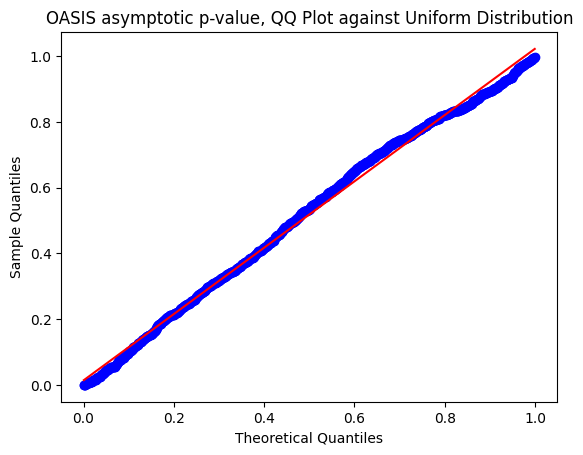

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate random data
# np.random.seed(0)
# data = np.random.normal(loc=0, scale=1, size=1000)

data = pv_asymp_arr

# Generate QQ plot
fig, ax = plt.subplots()
stats.probplot(data, dist="uniform", plot=ax)
ax.get_lines()[1].set_color('red')
ax.set_title('OASIS asymptotic p-value, QQ Plot against Uniform Distribution')
ax.set_xlabel('Theoretical Quantiles')
_=ax.set_ylabel('Sample Quantiles')

In [6]:
######## generate planted signal example
I=6
J=10
np.random.seed(0)
plantedGroups = (np.arange(J)>=J//2)*2-1


p1 = np.random.dirichlet(np.ones(I)*2)
p2 = np.random.dirichlet(np.ones(I)*2)
n = np.random.poisson(40, size=J)

X = np.zeros((I,J))
for j in range(J):
    if plantedGroups[j]==-1:
        X[:,j] = np.random.multinomial(n[j],p1)
    else:
        X[:,j] = np.random.multinomial(n[j],p2)
        
        
pval,fOpt,cOpt = OASIS_pvalue(X, numSplits=10, return_f_c=True)
# plt.imshow(X)

OASIS finite-sample p-value: 4.564415091702694e-10


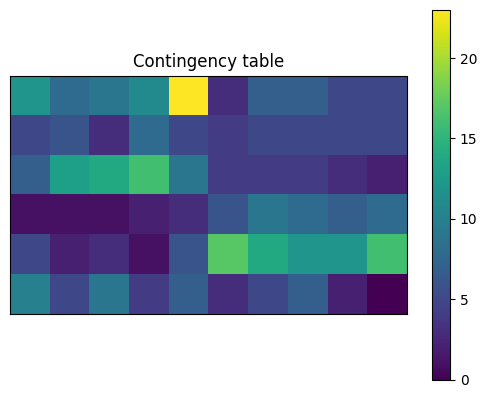

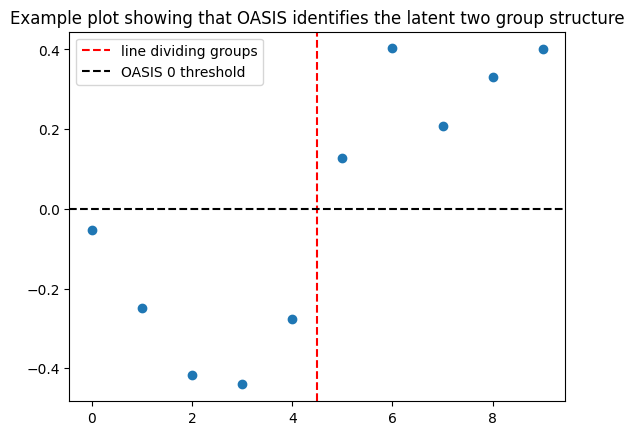

In [7]:
print('OASIS finite-sample p-value:',pval)
plt.imshow(X)
plt.xticks([])
plt.yticks([])
plt.title('Contingency table')
plt.colorbar()

plt.figure()
plt.scatter(np.arange(J),cOpt)
plt.title('Example plot showing that OASIS identifies the latent two group structure')
plt.axvline(J//2-.5, color='r', linestyle='--', label='line dividing groups')
plt.axhline(0, color='black', linestyle='--', label='OASIS 0 threshold')
plt.legend()